<a href="https://colab.research.google.com/github/niharich/Assignment-3/blob/main/keras_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Simple CNN model for CIFAR-10
import numpy
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
#from keras import backend as K
#K.set_image_dim_ordering('th')

# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
# normalize inputs from 0-255 to 0.0-1.0
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]
# Create the model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), padding='same', activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
# Compile model
epochs = 5
lrate = 0.01
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print(model.summary())
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

170498071/170498071 [==============================] - 13s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 512)              

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


None
Epoch 1/5
1563/1563 [==============================] - 19s 7ms/step - loss: 1.7354 - accuracy: 0.3733 - val_loss: 1.4369 - val_accuracy: 0.5006
Epoch 2/5
1563/1563 [==============================] - 9s 6ms/step - loss: 1.4248 - accuracy: 0.4901 - val_loss: 1.3136 - val_accuracy: 0.5398
Epoch 3/5
1563/1563 [==============================] - 9s 6ms/step - loss: 1.3078 - accuracy: 0.5340 - val_loss: 1.2325 - val_accuracy: 0.5646
Epoch 4/5
1563/1563 [==============================] - 9s 6ms/step - loss: 1.2347 - accuracy: 0.5587 - val_loss: 1.1862 - val_accuracy: 0.5801
Epoch 5/5
1563/1563 [==============================] - 9s 6ms/step - loss: 1.1778 - accuracy: 0.5790 - val_loss: 1.1509 - val_accuracy: 0.5927
Accuracy: 59.27%


In [3]:
import numpy as np

# Prediction for the first 4 images
predicted_labels = model.predict(X_test[:4])

# Convert softmax outputs to class labels
predicted_classes = np.argmax(predicted_labels, axis=1)

# Map class index to class label names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
actual_classes = np.argmax(y_test[:4], axis=1)
actual_labels = [class_names[i] for i in actual_classes]

# Display predictions and actual labels
for i in range(4):
    print(f"Image {i + 1}: Predicted - {class_names[predicted_classes[i]]}, Actual - {actual_labels[i]}")

1/1 [==============================] - 0s 141ms/step
Image 1: Predicted - cat, Actual - cat
Image 2: Predicted - ship, Actual - ship
Image 3: Predicted - ship, Actual - ship
Image 4: Predicted - ship, Actual - airplane


Epoch 1/5
1563/1563 [==============================] - 10s 6ms/step - loss: 1.1424 - accuracy: 0.5947 - val_loss: 1.1339 - val_accuracy: 0.5997
Epoch 2/5
1563/1563 [==============================] - 9s 6ms/step - loss: 1.1095 - accuracy: 0.6068 - val_loss: 1.1279 - val_accuracy: 0.5991
Epoch 3/5
1563/1563 [==============================] - 10s 6ms/step - loss: 1.0815 - accuracy: 0.6177 - val_loss: 1.0924 - val_accuracy: 0.6156
Epoch 4/5
1563/1563 [==============================] - 9s 6ms/step - loss: 1.0540 - accuracy: 0.6247 - val_loss: 1.0828 - val_accuracy: 0.6203
Epoch 5/5
1563/1563 [==============================] - 9s 6ms/step - loss: 1.0352 - accuracy: 0.6327 - val_loss: 1.0739 - val_accuracy: 0.6245


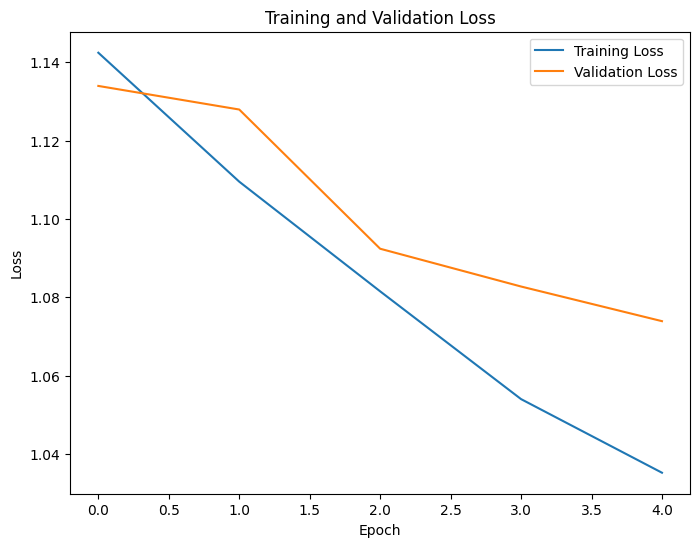

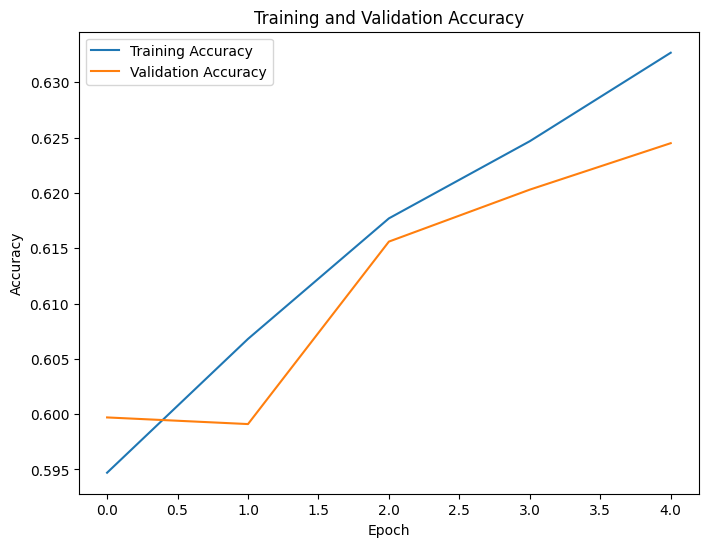

In [4]:
import matplotlib.pyplot as plt

# Fit the model and save the training history
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32)

# Plot training and validation loss
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

# Plot training and validation accuracy
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()
